# Historical Sales Analysis

In [ ]:
#let's import the essential modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)
sns.set_style('ticks')

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [2]:
#Here I first need to input the dataset for analysis
stores = pd.read_csv('C:/Users/mailn/Desktop/walmart/stores.csv')
features = pd.read_csv( 'C:/Users/mailn/Desktop/walmart/features.csv')
test = pd.read_csv('C:/Users/mailn/Desktop/walmart/test.csv')
train = pd.read_csv('C:/Users/mailn/Desktop/walmart/train.csv')

In [3]:
print(train.shape)
train.head(8)

(421570, 5)


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
5,1,1,2010-03-12,21043.39,False
6,1,1,2010-03-19,22136.64,False
7,1,1,2010-03-26,26229.21,False


In [4]:
#checking out the dataset size
print(test.shape)
test.head(8)

(115064, 4)


,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
5,1,1,2012-12-07,False
6,1,1,2012-12-14,False
7,1,1,2012-12-21,False


In [5]:
#For better data analysis and preproccesing, let's combine the train and test csv files
# concatenating test and train datasets
train['dataset'] = 'train'
test['dataset'] = 'test'
train_test = pd.concat([train, test])

# Merge all data
train_test = train_test.merge(stores, how='left').merge(features, how='left')

# Creating date-time objects and some extra date-time info
train_test['Date'] = pd.to_datetime(train_test['Date'])
train_test['Year'] = pd.to_datetime(train_test['Date']).dt.year
train_test['Month'] = pd.to_datetime(train_test['Date']).dt.month
train_test['Week'] = pd.to_datetime(train_test['Date']).dt.week
train_test['DayOfTheMonth'] = pd.to_datetime(train_test['Date']).dt.day

train_test.head(8)

,Store,Dept,Date,Weekly_Sales,IsHoliday,dataset,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week,DayOfTheMonth
0,1,1,2010-02-05,24924.50,False,train,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2,5,5
1,1,1,2010-02-12,46039.49,True,train,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,2010,2,6,12
2,1,1,2010-02-19,41595.55,False,train,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,2010,2,7,19
3,1,1,2010-02-26,19403.54,False,train,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,2010,2,8,26
4,1,1,2010-03-05,21827.90,False,train,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,2010,3,9,5
5,1,1,2010-03-12,21043.39,False,train,A,151315,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,2010,3,10,12
6,1,1,2010-03-19,22136.64,False,train,A,151315,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,2010,3,11,19
7,1,1,2010-03-26,26229.21,False,train,A,151315,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,2010,3,12,26


In [6]:
#To display different attribute types
train_test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 536634 entries, 0 to 536633
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Store          536634 non-null  int64         
 1   Dept           536634 non-null  int64         
 2   Date           536634 non-null  datetime64[ns]
 3   Weekly_Sales   421570 non-null  float64       
 4   IsHoliday      536634 non-null  bool          
 5   dataset        536634 non-null  object        
 6   Type           536634 non-null  object        
 7   Size           536634 non-null  int64         
 8   Temperature    536634 non-null  float64       
 9   Fuel_Price     536634 non-null  float64       
 10  MarkDown1      265596 non-null  float64       
 11  MarkDown2      197685 non-null  float64       
 12  MarkDown3      242326 non-null  float64       
 13  MarkDown4      237143 non-null  float64       
 14  MarkDown5      266496 non-null  float64       
 15  

In [7]:
#To see the type of each corresponding field
pd.DataFrame(train_test.dtypes).reset_index().rename(columns={'index':'Columns', 0:'Type'})

,Columns,Type
0,Store,int64
1,Dept,int64
2,Date,datetime64[ns]
3,Weekly_Sales,float64
4,IsHoliday,bool
5,dataset,object
6,Type,object
7,Size,int64
8,Temperature,float64
9,Fuel_Price,float64


# Numeric Features Analysis[with 1 variable]

In [8]:
# all numeric columns
numeric = train_test.select_dtypes(include=['number']).copy()

# discrete number columns for generating bar-graphs
disc_num_var = ['Year','Month','Week','DayOfTheMonth']

# continious number columns for generating histograms
cont_num_var = []
for i in numeric:
    if i not in disc_num_var:
        cont_num_var.append(i)
        
# print('Discrete:', disc_num_var)
print('Continious:', cont_num_var)
print('Numeric_all:', numeric)

Continious: ['Store', 'Dept', 'Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']
Numeric_all:         Store  Dept  Weekly_Sales    Size  Temperature  Fuel_Price  MarkDown1  \
0           1     1      24924.50  151315        42.31       2.572        NaN   
1           1     1      46039.49  151315        38.51       2.548        NaN   
2           1     1      41595.55  151315        39.93       2.514        NaN   
3           1     1      19403.54  151315        46.63       2.561        NaN   
4           1     1      21827.90  151315        46.50       2.625        NaN   
...       ...   ...           ...     ...          ...         ...        ...   
536629     45    98           NaN  118221        76.05       3.639    4842.29   
536630     45    98           NaN  118221        77.50       3.614    9090.48   
536631     45    98           NaN  118221        79.37       3.614    3789.94   
536632

In [9]:
# all categorical columns
categoric = train_test.select_dtypes(exclude=['number']).drop(['Date', 'dataset'], axis=1).copy()
categoric.columns

Index(['IsHoliday', 'Type'], dtype='object')

# Using histograms for analysis of continious numeric variables


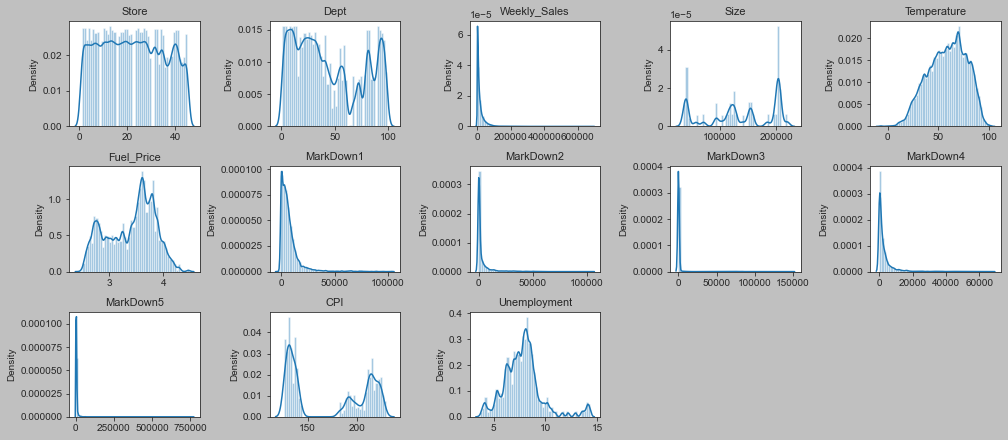

In [10]:
fig = plt.figure(figsize=(14,10), facecolor= 'silver')

for index, col in enumerate(cont_num_var): 
    plt.subplot(5,5,index+1) 
    sns.distplot(numeric.loc[:,col].dropna(), kde=True) 
    plt.xlabel(None)
    plt.title(col, fontsize=11)
fig.tight_layout(pad=1.0) 

# Now plotting Boxplots for finding outliers.

it is clearly observable that all the markdowns have outliers and there are few outlies in type unemployment

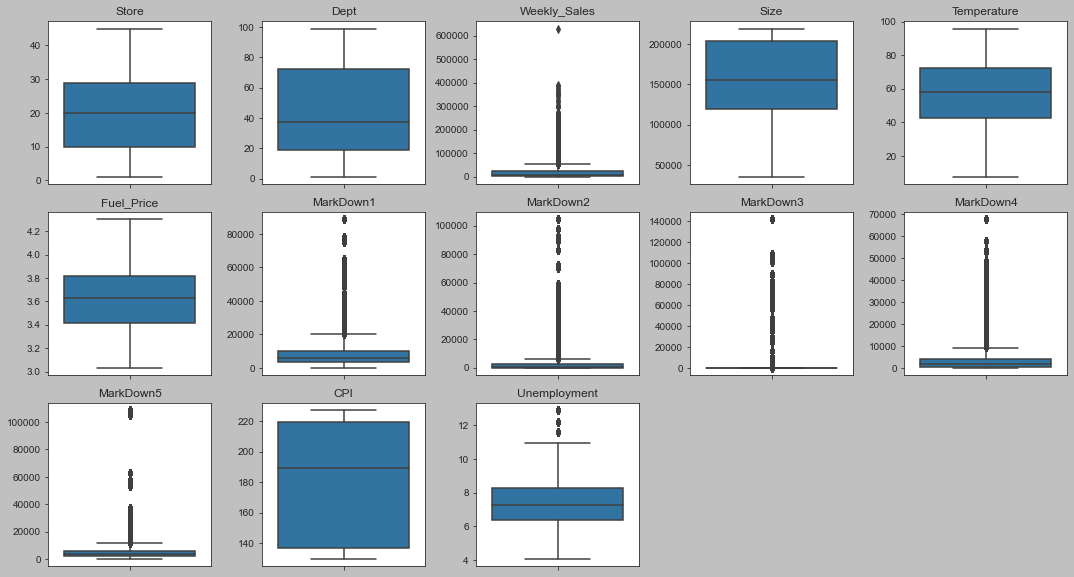

In [11]:
fig = plt.figure(figsize=(15,16), facecolor= 'silver')

for index, col in enumerate(cont_num_var):
    plt.subplot(6,5,index+1)
    sns.boxplot(y=col, data=numeric.dropna())
    plt.ylabel(None)
    plt.title(col, fontsize=12)
fig.tight_layout(pad=1.0)

# Analysis of discreate numeric variables


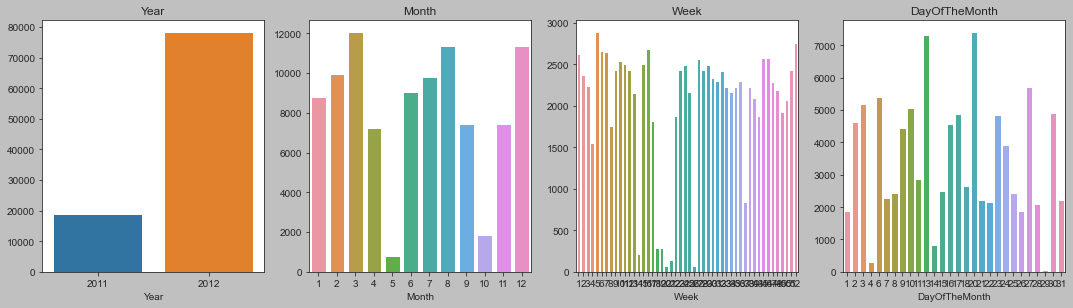

In [12]:
fig = plt.figure(figsize=(15,8), facecolor= 'silver')

for index, col in enumerate(disc_num_var):
    plt.subplot(2, 4, index+1)
    sns.countplot(x=col, data=numeric.dropna()) 
    plt.ylabel(None)
    plt.title(col)
fig.tight_layout(pad=1.0)

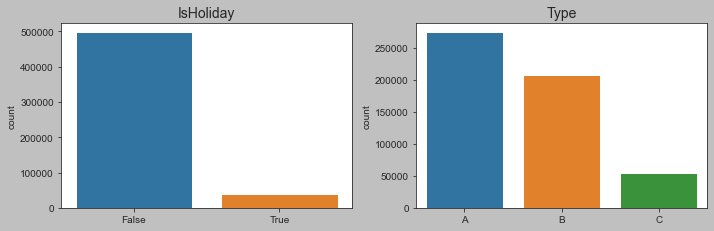

In [13]:
#Analysis of categorical types

categoric['IsHoliday'] = categoric['IsHoliday'].apply(str)

fig = plt.figure(figsize=(10,6), facecolor= 'silver')
for index, col in enumerate(categoric):
    plt.subplot(2,2,index+1)
    sns.countplot(x=categoric[col], data=categoric.dropna())
    plt.xlabel(None)
    plt.title(col, fontsize=14)
fig.tight_layout(pad=1.0)

# Understanding relations between attributes

fields which are positively corelated with each other

1) MarkDown1 - MarkDown4
2) Year - Fuel_price
3) Week - Month
4) Type - Size
5) Size- DayOfThemMonth

And it can be observed that that store type or size has nothing to do with the sales. since they are negatively corelated.

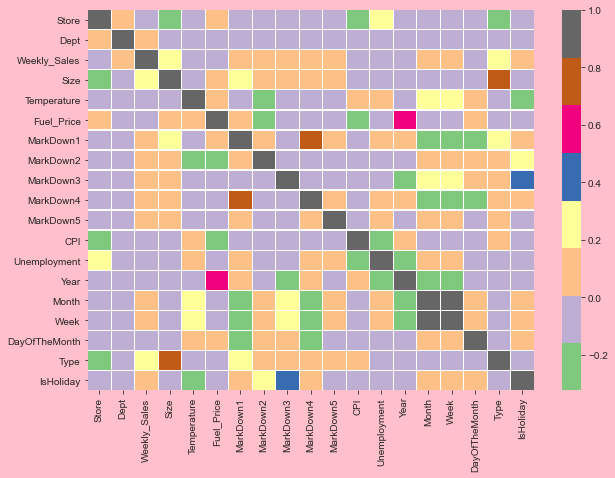

In [14]:
plt.figure(figsize=(10,7), facecolor= 'pink')
# joining isholiday and type
numeric['Type'] = categoric['Type'].replace({'A': 3, 'B': 2, 'C': 1})
numeric['IsHoliday'] = categoric['IsHoliday'].replace({'False': 0, 'True': 1})
cor = numeric.corr()
sns.heatmap(cor, linewidths=0.2, cmap='Accent') 
plt.show()

In [15]:
train_test.corr()[['Weekly_Sales']].apply(abs).sort_values('Weekly_Sales', ascending=False).head(10)

,Weekly_Sales
Weekly_Sales,1.000000
Size,0.243828
Dept,0.148032
MarkDown5,0.090362
MarkDown1,0.085251
Store,0.085195
MarkDown3,0.060385
MarkDown4,0.045414
Month,0.028409
Week,0.027673


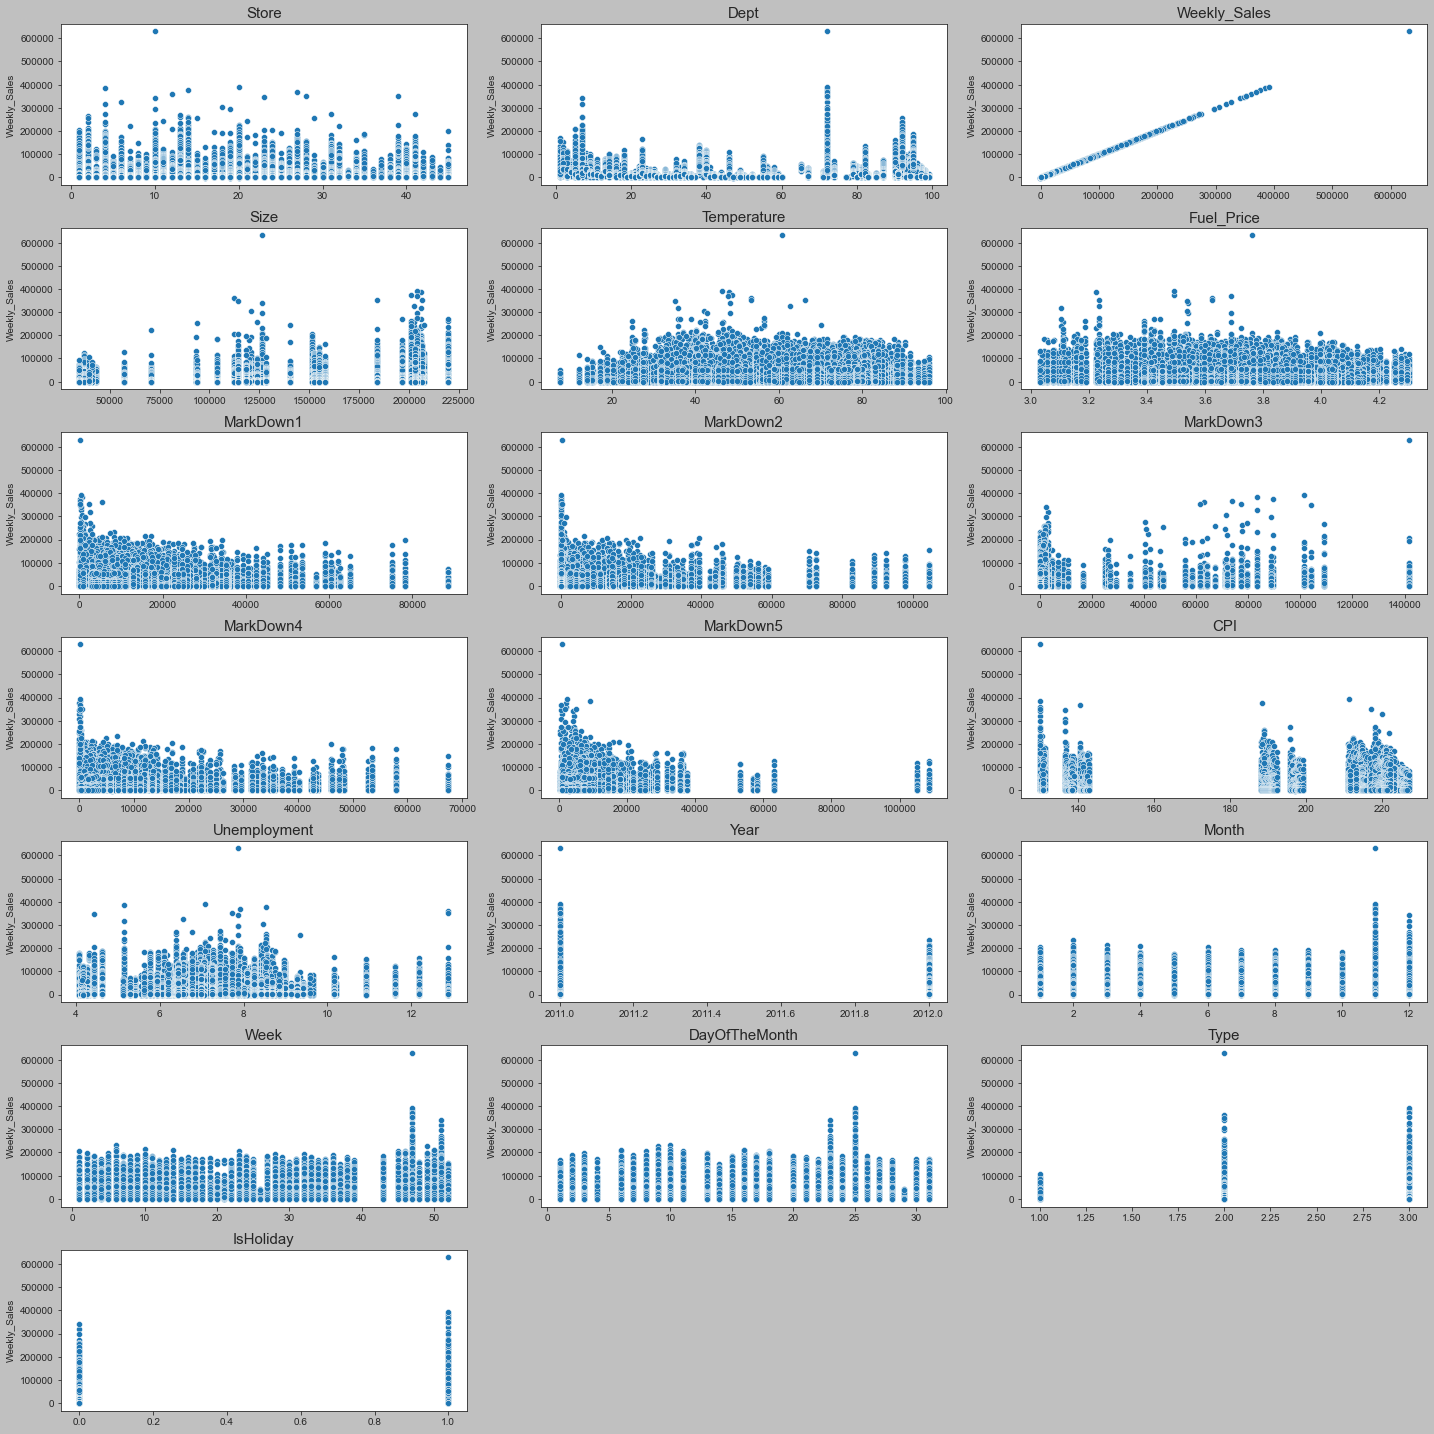

In [16]:
fig = plt.figure(figsize=(20,20), facecolor= 'silver')
for index, col in enumerate(numeric):
    plt.subplot(7,3,index+1)
    sns.scatterplot(x=col, y='Weekly_Sales', data=numeric.dropna())
    plt.title(col, fontsize=15)
    plt.xlabel(None)
    plt.ylabel('Weekly_Sales')
fig.tight_layout(pad=1.0)    
plt.show()

In [17]:
# Creating a column with markdown_totals

# This indicates that there are more markdowns before the holiday week
train_test['markdown_totals'] = train_test[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].sum(axis=1)
train_test.groupby('IsHoliday')[['markdown_totals']].mean()

,markdown_totals
IsHoliday,
False,8044.327162
True,27595.802604


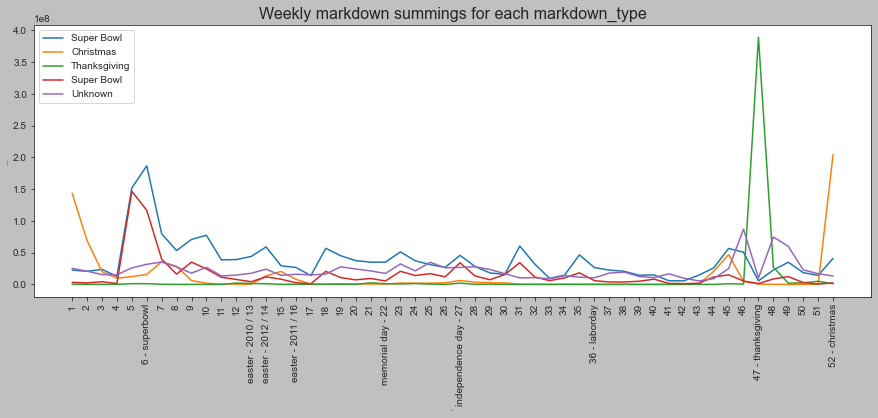

In [18]:
plt.figure(figsize=(15,5), facecolor = 'silver')

# working on xticks labels with dates
weeks = [str(i) for i in range(1,53)]
weeks[5] = '6 - superbowl'
weeks[12] = 'easter - 2010 / 13'
weeks[13] = 'easter - 2012 / 14'
weeks[15] = 'easter - 2011 / 16'
weeks[21] = 'memorial day - 22'
weeks[26] = 'independence day - 27'
weeks[35] = '36 - laborday'
weeks[46] = '47 - thanksgiving'
weeks[51] = '52 - christmas'

# plotting markdowns 1 to 6
for i in range(1,6):
    markdown_df = train_test[train_test['MarkDown' + str(i)] > 0].groupby(train_test['Date'].dt.week)[['MarkDown' + str(i)]].sum()
    plt.plot(markdown_df.index, markdown_df[['MarkDown' + str(i)]].values, label='MarkDown' + str(i))

plt.xticks(np.arange(1, 53, step=1), labels=weeks, rotation=90)
plt.legend(['Super Bowl','Christmas','Thanksgiving','Super Bowl','Unknown'], loc=2)
plt.title('Weekly markdown summings for each markdown_type', fontsize=16)
plt.ylabel('markdown_totals', fontsize=1)
plt.xlabel('Weeks', fontsize=1)
plt.show()

# Analysis of Type & Size colrelation

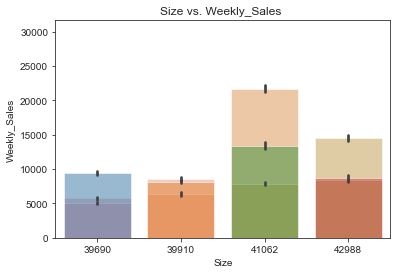

In [19]:
for i in train_test['Type'].unique():
    local_data = train_test[train_test['Type'] == i]
    sns.barplot(local_data['Size'], local_data['Weekly_Sales'], alpha=0.5)
    
plt.title('Size vs. Weekly_Sales ')
plt.show()

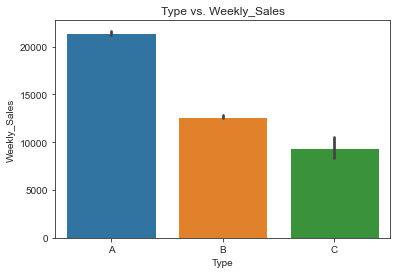

In [20]:
plt.title('Type vs. Weekly_Sales')
sns.barplot(y='Weekly_Sales', x='Type', data=train_test.dropna())
plt.show()

# its clearly observable that Type A stores have comparatively higher weekly sales then the other 2 types

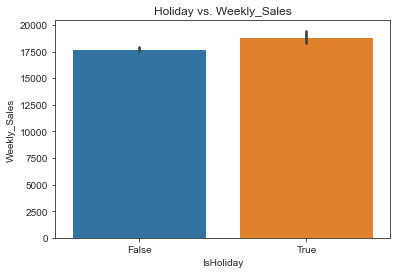

In [21]:
plt.title('Holiday vs. Weekly_Sales')
sns.barplot(y='Weekly_Sales', x='IsHoliday', data=train_test.dropna())
plt.show()

# it shows that the sales were high during the special hodiday week period

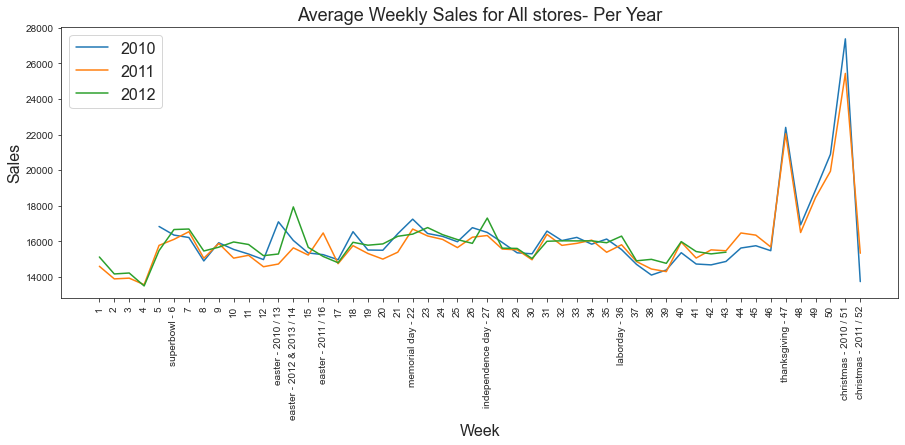

In [22]:
# making datasets for next plot
weekly_sales_2010 = train_test[train_test['Date'].dt.year == 2010].groupby(train_test['Date'].dt.week)[['Weekly_Sales']].mean()
weekly_sales_2011 = train_test[train_test['Date'].dt.year == 2011].groupby(train_test['Date'].dt.week)[['Weekly_Sales']].mean()
weekly_sales_2012 = train_test[train_test['Date'].dt.year == 2012].groupby(train_test['Date'].dt.week)[['Weekly_Sales']].mean()

plt.figure(figsize=(15,5))

# working on xticks labels with dates
weeks = [str(i) for i in range(1,53)]
weeks[5] = 'superbowl - 6'
weeks[12] = 'easter - 2010 / 13'
weeks[13] = 'easter - 2012 & 2013 / 14'
weeks[15] = 'easter - 2011 / 16'
weeks[21] = 'memorial day - 22'
weeks[26] = 'independence day - 27'
weeks[35] = 'laborday - 36'
weeks[46] = 'thanksgiving - 47'
weeks[50] = 'christmas - 2010 / 51'
weeks[51] = 'christmas - 2011 / 52'

# plotting 
plt.plot(weekly_sales_2010.index, weekly_sales_2010['Weekly_Sales'])
plt.plot(weekly_sales_2011.index, weekly_sales_2011['Weekly_Sales'])
plt.plot(weekly_sales_2012.index, weekly_sales_2012['Weekly_Sales'])

plt.xticks(np.arange(1, 53, step=1), labels=weeks, rotation=90)
plt.legend(['2010', '2011', '2012'], fontsize=16)
plt.title('Average Weekly Sales for All stores- Per Year', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.show()

# its observable that sales usually start getting boost up from the thanlsgiving week up until the christmas week.

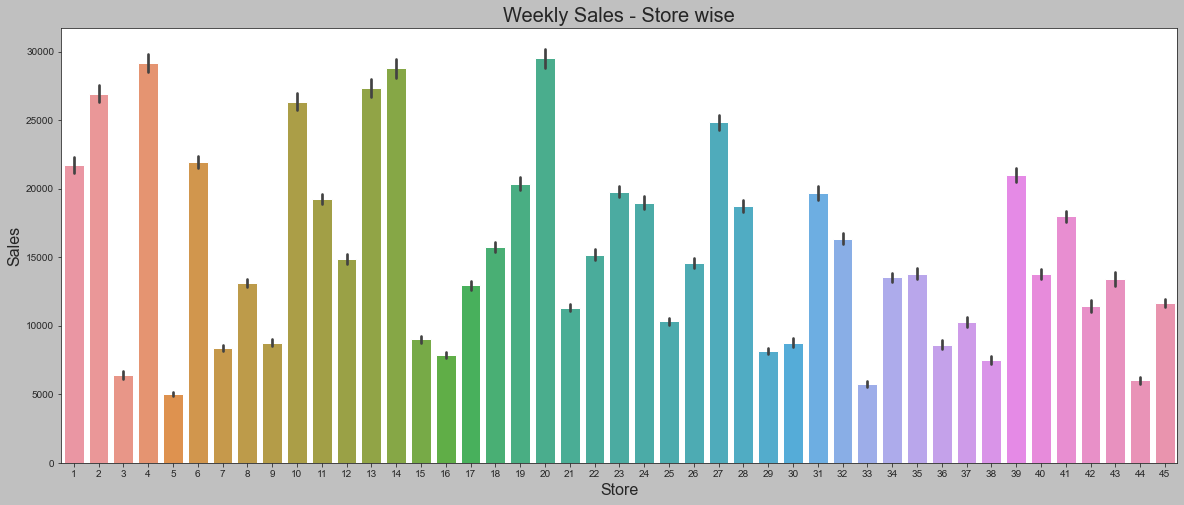

In [23]:
plt.figure(figsize=(20,8), facecolor='silver')
sns.barplot(x='Store', y='Weekly_Sales', data=train_test)
plt.title('Weekly Sales - Store wise', fontsize=20)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.show()

# it can be seen that the 20th store has counted for the highest sales number

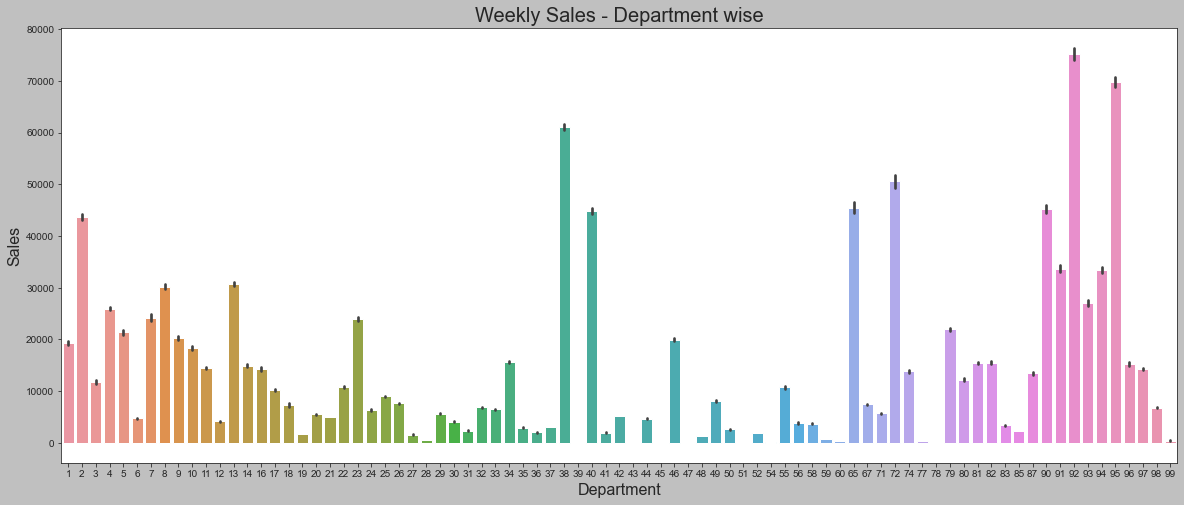

In [24]:
plt.figure(figsize=(20,8), facecolor='silver')
sns.barplot(x='Dept', y='Weekly_Sales', data=train_test)
plt.title('Weekly Sales - Department wise', fontsize=20)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Department', fontsize=16)
plt.show()

# it can be seen that the 92nd dept has counted for the highest sales number

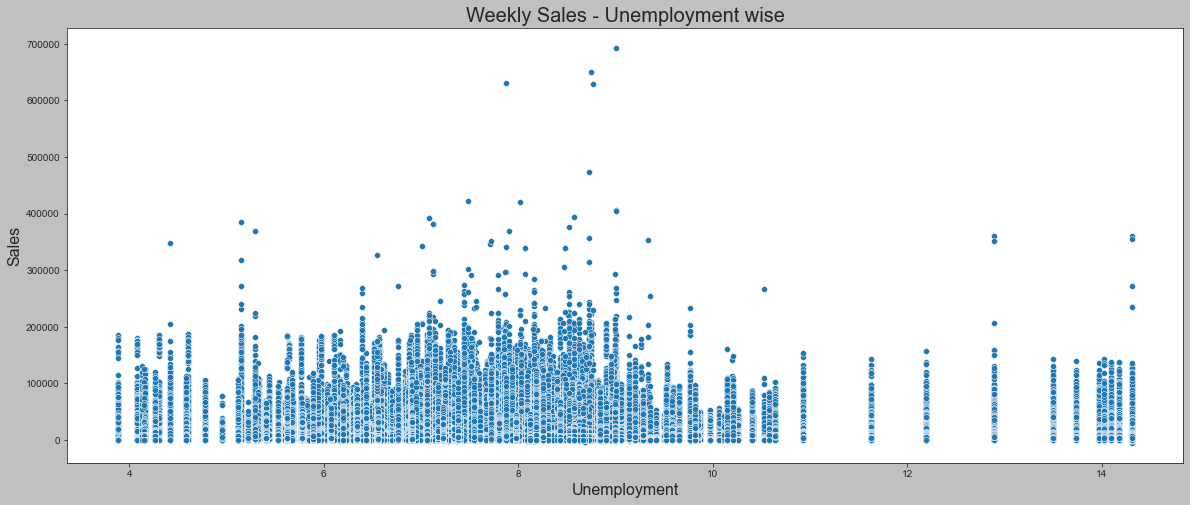

In [25]:
plt.figure(figsize=(20,8), facecolor='silver')
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=train_test)
plt.title('Weekly Sales - Unemployment wise', fontsize=20)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Unemployment', fontsize=16)
plt.show()

# it can be seen that the regions with high rate of Unemployment saw fewer sales barring few outliers.